Mit Binder oder Colab kann das Jupyter-Notebook interaktiv im Browser gestartet werden:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opendatazurich/opendatazurich.github.io/master?filepath=parkendd-api/ParkenDD-Beispiel.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opendatazurich/opendatazurich.github.io/blob/master/parkendd-api/ParkenDD-Beispiel.ipynb)


# Python Beispiele für das Parken DD API

In [2]:
%pip install requests pandas pendulum

Note: you may need to restart the kernel to use updated packages.


In [91]:
import requests
import random
import pandas as pd
from urllib.parse import urljoin
import pendulum

In [5]:
SSL_VERIFY = True
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://api.parkendd.de nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

In [98]:
headers = {'Accept': 'application/json'}
BASE_URL = 'https://api.parkendd.de/Zuerich'
r = requests.get(BASE_URL, headers=headers, verify=SSL_VERIFY)
data = r.json()
data

{'last_downloaded': '2019-09-30T13:20:02',
 'last_updated': '2019-09-30T13:20:02',
 'lots': [{'address': 'Seilergraben',
   'coords': {'lat': 47.376579, 'lng': 8.544743},
   'forecast': False,
   'free': 19,
   'id': 'zuerichparkgarageamcentral',
   'lot_type': '',
   'name': 'Parkgarage am Central',
   'state': 'open',
   'total': 50},
  {'address': 'Otto-Schütz-Weg',
   'coords': {'lat': 47.414848, 'lng': 8.540748},
   'forecast': False,
   'free': 131,
   'id': 'zuerichparkhausaccu',
   'lot_type': 'Parkhaus',
   'name': 'Accu',
   'state': 'open',
   'total': 194},
  {'address': 'Badenerstrasse 380',
   'coords': {'lat': 47.379458, 'lng': 8.509675},
   'forecast': False,
   'free': 51,
   'id': 'zuerichparkhausalbisriederplatz',
   'lot_type': 'Parkhaus',
   'name': 'Albisriederplatz',
   'state': 'open',
   'total': 66},
  {'address': 'Beethovenstrasse 35',
   'coords': {'lat': 47.367417, 'lng': 8.535761},
   'forecast': False,
   'free': 37,
   'id': 'zuerichparkhausbleicherweg',

In [99]:
lots = pd.DataFrame(data['lots'])
lots

,address,coords,forecast,free,id,lot_type,name,state,total
0,Seilergraben,"{'lat': 47.376579, 'lng': 8.544743}",False,19,zuerichparkgarageamcentral,,Parkgarage am Central,open,50
1,Otto-Schütz-Weg,"{'lat': 47.414848, 'lng': 8.540748}",False,131,zuerichparkhausaccu,Parkhaus,Accu,open,194
2,Badenerstrasse 380,"{'lat': 47.379458, 'lng': 8.509675}",False,51,zuerichparkhausalbisriederplatz,Parkhaus,Albisriederplatz,open,66
3,Beethovenstrasse 35,"{'lat': 47.367417, 'lng': 8.535761}",False,37,zuerichparkhausbleicherweg,Parkhaus,Bleicherweg,open,275
4,Sophie-Täuber-Strasse 4,"{'lat': 47.412805, 'lng': 8.540263}",False,116,zuerichparkhauscentereleven,Parkhaus,Center Eleven,open,342
5,Gessnerallee 14,"{'lat': 47.374211, 'lng': 8.533806}",False,249,zuerichparkhauscityparking,Parkhaus,City Parking,open,620
6,Affolternstrasse 56,"{'lat': 47.410876, 'lng': 8.540662}",False,29,zuerichparkhauscityport,Parkhaus,Cityport,open,153
7,Badenerstrasse 420,None,False,117,zuerichparkhauscrowneplaza,Parkhaus,Crowne Plaza,open,520
8,Schwamendingenstrasse 31,"{'lat': 47.407194, 'lng': 8.550214}",False,32,zuerichparkhausdorflinde,Parkhaus,Dorflinde,open,98
9,Riesbachstrasse 7,"{'lat': 47.360644, 'lng': 8.55344}",False,51,zuerichparkhausfeldegg,Parkhaus,Feldegg,open,346


In [105]:
random_lots = []
for i in range(0, 4):
    random_lots.append(random.choice(data['lots'])['id'])
random_lots

['zuerichparkplatzeisfeld',
 'zuerichparkhausopéra',
 'zuerichparkhaustalgarten',
 'zuerichparkhauszueri11shopping']

In [106]:
# Hole die Einträge des letzten Monats
# Über den /timespan Endpunkt lassen sich nur 7 Tage in einem Request abfragen
for lot_id in random_lots:
    lot_url = '%s/%s/timespan' % (BASE_URL, lot_id)
    print(lot_url)

    now = pendulum.now()
    start_date = now.subtract(weeks=4).end_of('day')
    iso_format_wo_timezone = 'YYYY-MM-DDTHH:mm:ss'

    data = []
    while start_date < now:
        params = {
            'version': '1.1',
            'from': start_date.format(iso_format_wo_timezone),
            'to': start_date.add(weeks=1).format(iso_format_wo_timezone),
        }
        print("Loading data from %s to %s" % (params['from'], params['to']))
        r = requests.get(lot_url, params=params, headers=headers, verify=SSL_VERIFY)
        new_data = r.json()
        for d in new_data['data']:
            d.update({'lot_id': lot_id})
        data.extend(new_data['data'])
        start_date = start_date.add(weeks=1)

https://api.parkendd.de/Zuerich/zuerichparkplatzeisfeld/timespan
Loading data from 2019-09-02T23:59:59 to 2019-09-09T23:59:59
Loading data from 2019-09-09T23:59:59 to 2019-09-16T23:59:59
Loading data from 2019-09-16T23:59:59 to 2019-09-23T23:59:59
Loading data from 2019-09-23T23:59:59 to 2019-09-30T23:59:59
https://api.parkendd.de/Zuerich/zuerichparkhausopéra/timespan
Loading data from 2019-09-02T23:59:59 to 2019-09-09T23:59:59
Loading data from 2019-09-09T23:59:59 to 2019-09-16T23:59:59
Loading data from 2019-09-16T23:59:59 to 2019-09-23T23:59:59
Loading data from 2019-09-23T23:59:59 to 2019-09-30T23:59:59
https://api.parkendd.de/Zuerich/zuerichparkhaustalgarten/timespan
Loading data from 2019-09-02T23:59:59 to 2019-09-09T23:59:59
Loading data from 2019-09-09T23:59:59 to 2019-09-16T23:59:59
Loading data from 2019-09-16T23:59:59 to 2019-09-23T23:59:59
Loading data from 2019-09-23T23:59:59 to 2019-09-30T23:59:59
https://api.parkendd.de/Zuerich/zuerichparkhauszueri11shopping/timespan
Loa

In [107]:
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df.timestamp)
df

,free,lot_id,timestamp
0,0,zuerichparkhauszueri11shopping,2019-09-03 00:00:32
1,57,zuerichparkhauszueri11shopping,2019-09-03 04:30:05
2,0,zuerichparkhauszueri11shopping,2019-09-03 00:10:02
3,0,zuerichparkhauszueri11shopping,2019-09-03 00:45:05
4,0,zuerichparkhauszueri11shopping,2019-09-03 01:00:23
5,0,zuerichparkhauszueri11shopping,2019-09-03 01:05:21
6,0,zuerichparkhauszueri11shopping,2019-09-03 01:10:23
7,0,zuerichparkhauszueri11shopping,2019-09-03 01:55:30
8,0,zuerichparkhauszueri11shopping,2019-09-03 02:05:26
9,0,zuerichparkhauszueri11shopping,2019-09-03 02:15:29


In [108]:
all_info = pd.merge(df, lots, left_on='lot_id', right_on='id', suffixes=('', '_lot'))
all_info.set_index('timestamp', inplace=True, drop=False)
all_info

,free,lot_id,timestamp,address,coords,forecast,free_lot,id,lot_type,name,state,total
timestamp,,,,,,,,,,,,
2019-09-03 00:00:32,0,zuerichparkhauszueri11shopping,2019-09-03 00:00:32,Nansenstrasse 5/7,"{'lat': 47.4105, 'lng': 8.545035}",False,16,zuerichparkhauszueri11shopping,Parkhaus,Züri 11 Shopping,open,60
2019-09-03 04:30:05,57,zuerichparkhauszueri11shopping,2019-09-03 04:30:05,Nansenstrasse 5/7,"{'lat': 47.4105, 'lng': 8.545035}",False,16,zuerichparkhauszueri11shopping,Parkhaus,Züri 11 Shopping,open,60
2019-09-03 00:10:02,0,zuerichparkhauszueri11shopping,2019-09-03 00:10:02,Nansenstrasse 5/7,"{'lat': 47.4105, 'lng': 8.545035}",False,16,zuerichparkhauszueri11shopping,Parkhaus,Züri 11 Shopping,open,60
2019-09-03 00:45:05,0,zuerichparkhauszueri11shopping,2019-09-03 00:45:05,Nansenstrasse 5/7,"{'lat': 47.4105, 'lng': 8.545035}",False,16,zuerichparkhauszueri11shopping,Parkhaus,Züri 11 Shopping,open,60
2019-09-03 01:00:23,0,zuerichparkhauszueri11shopping,2019-09-03 01:00:23,Nansenstrasse 5/7,"{'lat': 47.4105, 'lng': 8.545035}",False,16,zuerichparkhauszueri11shopping,Parkhaus,Züri 11 Shopping,open,60
2019-09-03 01:05:21,0,zuerichparkhauszueri11shopping,2019-09-03 01:05:21,Nansenstrasse 5/7,"{'lat': 47.4105, 'lng': 8.545035}",False,16,zuerichparkhauszueri11shopping,Parkhaus,Züri 11 Shopping,open,60
2019-09-03 01:10:23,0,zuerichparkhauszueri11shopping,2019-09-03 01:10:23,Nansenstrasse 5/7,"{'lat': 47.4105, 'lng': 8.545035}",False,16,zuerichparkhauszueri11shopping,Parkhaus,Züri 11 Shopping,open,60
2019-09-03 01:55:30,0,zuerichparkhauszueri11shopping,2019-09-03 01:55:30,Nansenstrasse 5/7,"{'lat': 47.4105, 'lng': 8.545035}",False,16,zuerichparkhauszueri11shopping,Parkhaus,Züri 11 Shopping,open,60
2019-09-03 02:05:26,0,zuerichparkhauszueri11shopping,2019-09-03 02:05:26,Nansenstrasse 5/7,"{'lat': 47.4105, 'lng': 8.545035}",False,16,zuerichparkhauszueri11shopping,Parkhaus,Züri 11 Shopping,open,60


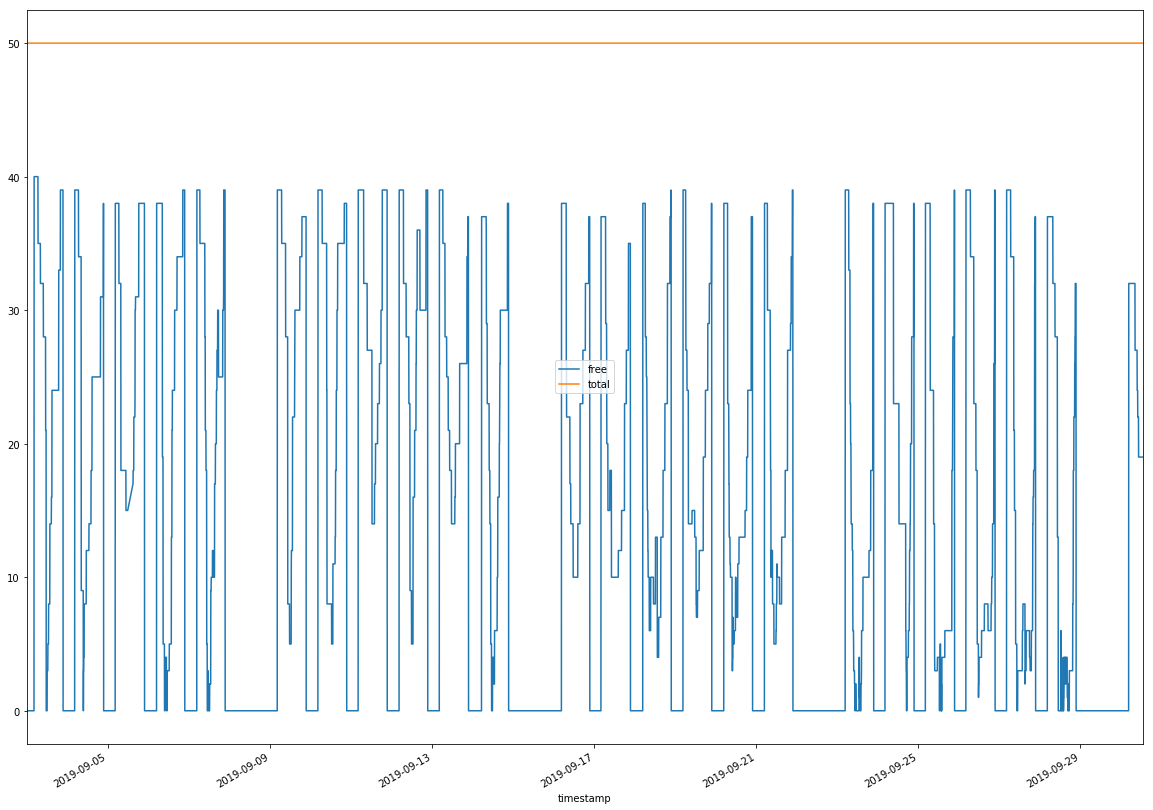

In [85]:
all_info.plot.line(y=['free', 'total'], figsize=(20,15))